## Stacks pipeline batch 2 - data exploration & visualization

<br>
This notebook includes: 
1. heterozygosity v. read depth
2. Haplotype Fis distribution
4. read depth by tag number, distribution of read depth per tag
5. Histogram of SNP position in read
6. Fst v. SNP position (for haplotypes with only 1 SNP)
7. Het v. SNP position 
8. Fis v. heterozygosity

<br>
<br>
#### 6/14/2017
<br>
### (1) heterozygosity v. read depth 

**This uses a script from Dan Drinan to compare average observed heterozygosity v. read depth by individual. I ran the script on all individuals that were *retained after the filtering steps***

**Observed heterozygosity was calculated using `genepop`**

**Read depth was calculated as the number of sequences in the original `fastq` file. **

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [4]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/scripts


In [8]:
!head -n 30 hetVsReadDepth.py



################################################################################
#
# hetVsReadDepth.py - this is a script used to compare heterozygosity vs.
# read depth in an individual or list of individuals
#
# 2017-March-28
# Daniel Drinan (ddrinan@uw.edu)
#
################################################################################

import argparse, subprocess

parser = argparse.ArgumentParser()
# it is either run with '-l' if you want to compare heterozygosity and read depth
# of a bunch of individuals
#
# or, if you are only interested in a single individual, you run with '-i' and
# '-f' 
parser.add_argument("-l", "--list", help="white space delimited list of individuals \
                                          (column1) and corresponding sequence file \
                                          (column2; FASTA or FASTQ) to investigate")
parser.add_argument("-i", "--ind", help="name of individual to investigate (mutually \
                                         exclu

In [9]:
!mv hetVsReadDepth.py ../samplesT92/hetVsReadDepth.py

In [10]:
cd ../samplesT92/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/samplesT92


In [ ]:
!python hetVsReadDepth.py \
-l ../analyses/batch_2_FinalFilteredIndivids.txt \
-f ../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids_filteredHWE.gen \
-o ../analyses/batch2_HetvReadDepth_filtered \
-d 4

In [1]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [2]:
myfile = open("batch2_HetvReadDepth_filtered", "r")

count = 0
read_depth = []
prop_het = []

for line in myfile: 
    if count > 1: 
        new_depth = line.strip().split()[1]
        new_het = line.strip().split()[2]
        read_depth.append(new_depth)
        prop_het.append(new_het)
        count += 1
    else: 
        count += 1

myfile.close()

print "Processed ", count, " samples."


Processed  287  samples.


In [3]:
length = len(read_depth)
for i in range(0,length):
    read_depth[i] = float(read_depth[i])

length = len(prop_het)
for i in range(0,length):
    prop_het[i] = float(prop_het[i])
    

In [4]:
import numpy as np
import matplotlib.pyplot as plt

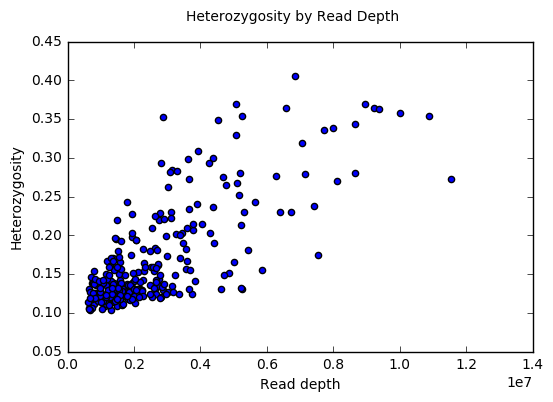

In [5]:
plt.scatter(read_depth, prop_het)
plt.suptitle("Heterozygosity by Read Depth")
plt.xlabel("Read depth")
plt.ylabel("Heterozygosity")
plt.show()

In [6]:
plt.close()

To find the correlation between the two: 

In [7]:
np.corrcoef(read_depth, prop_het)

array([[ 1.        ,  0.76704982],
       [ 0.76704982,  1.        ]])

<br>

**The correlation between heterozygosity and read depth is 0.7594**


<br>
<br>
<br>
<br>

### (2) Haplotype Fis distribution 

**This looks at the frequency of Fis values across haplotypes - first overall, and then in each population. The haplotype is the combination of biallelic SNPs that is genotyped by stacks**

**This Fis was calculated using hierfstat and adegenet in R. **


<br>
<br>




**(1)** I ran this [r script](https://github.com/mfisher5/PCod-US-repo/blob/master/analyses/Fis.R) - borrowed from Natalie - to find per population Fis and heterozygosity. 

<br>
**(2)** Plot in frequency histogram based off of Natalie's [scallop notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/script_demos_notebooks/Plot%20num%20alleles%20per%20locus%20from%20catalog%20file.ipynb).

In [10]:
genepop = open("USpcod_Fis_batch2.txt", "r")
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]
fis_bypop = []
fis_all = []

counter = 1
NA_count = 0
total_count = 0
for line in genepop: 
    if counter == 1: 
            counter += 1
    else: 
        fis_values = line.strip().split()[1:]
        for i in fis_values:
            if i == "NA":
                NA_count += 1
                total_count += 1
            else: 
                fis_all.append(float(i))
                total_count += 1
        counter += 1

total_loci = counter - 2
print "Fis values recorded from ", total_loci, " loci."
print "Removed ", NA_count, " NAs from ", total_count, " Fis values"
        

Fis values recorded from  2410  loci.
Removed  3462  NAs from  19280  Fis values


In [11]:
for i in range(0, len(fis_all)): 
    fis_all[i] = float(fis_all[i])

In [12]:
import numpy as np
import matplotlib.pyplot as plt

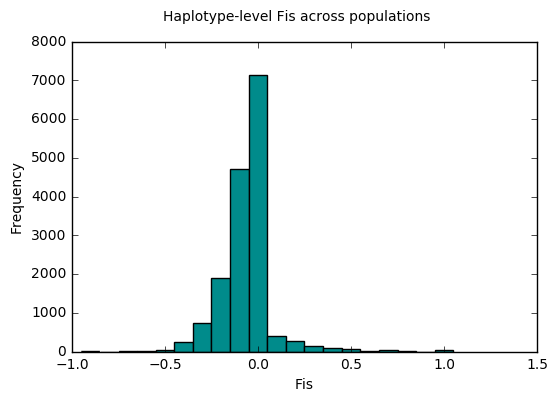

In [13]:
plt.hist(fis_all, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Haplotype-level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [14]:
fis_file = open("USpcod_Fis_3-24.txt", "r")
lines = fis_file.readlines() # exclude header
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines
header_pops = headerline.strip().split("\t")
header_pops = header_pops[1:]
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]

In [15]:
header_pops

['"AD06_048"',
 '"WC05_048"',
 '"HS04_048"',
 '"PS12_009"',
 '"GS13_017"',
 '"PWS12_133"',
 '"UP03_048"']

In [16]:
fis_sets = []
NA_count = 0
total_count = 0

snp_all_fis = []
for pop in header_pops:
    pop_fis = []
    pop_index = header_pops.index(pop) + 1
    for line in restlines:
        linelist = line.strip().split("\t")
        snp_fis = linelist[pop_index]
        if snp_fis == "NA":
            NA_count += 1
            total_count += 1
        elif snp_fis != "NA":
            snp_fis = float(snp_fis)
            pop_fis.append(snp_fis)
            snp_all_fis.append(snp_fis)
            total_count += 1
    fis_sets.append(pop_fis)

print "NA count: " + str(NA_count)
print "NAs made up " + str(float(NA_count)/float(total_count)*100)[0:5] + "% of your Fis estimates."

NA count: 4616
NAs made up 17.13% of your Fis estimates.


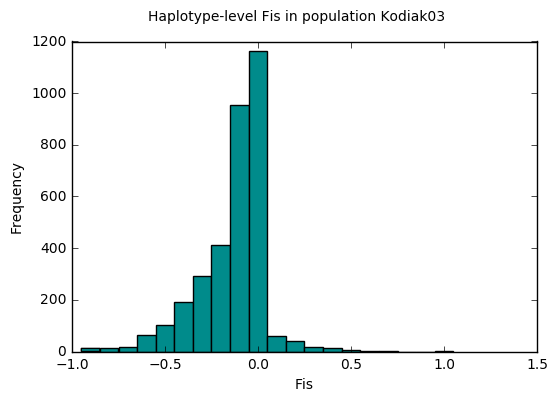

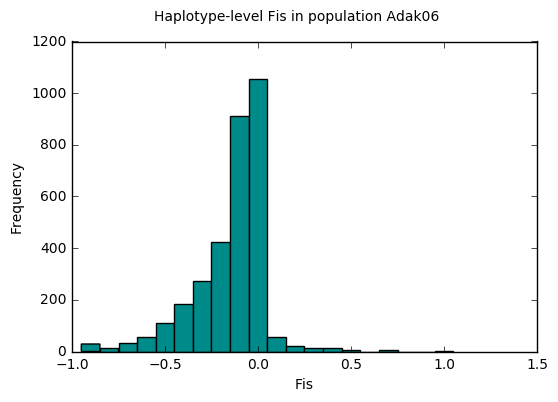

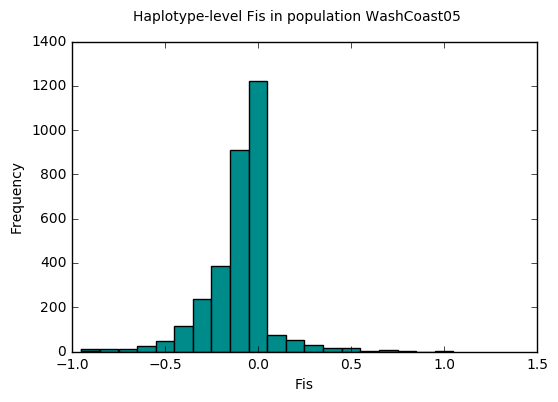

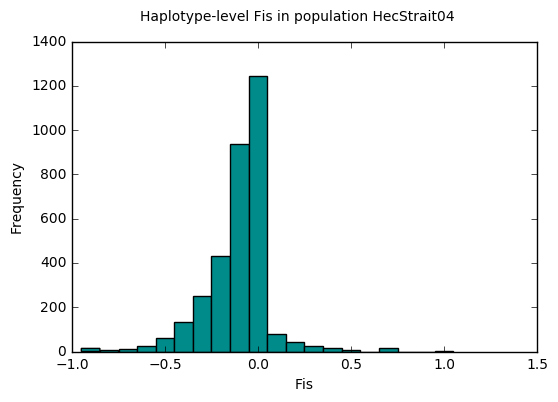

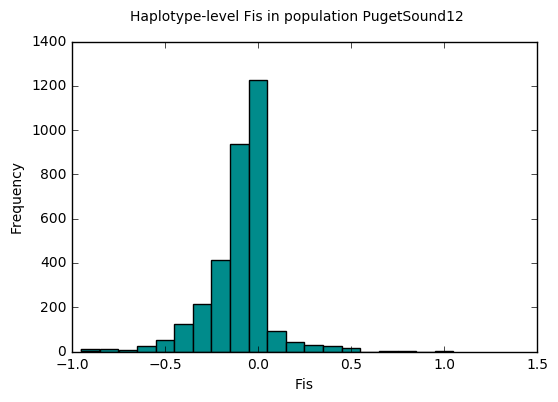

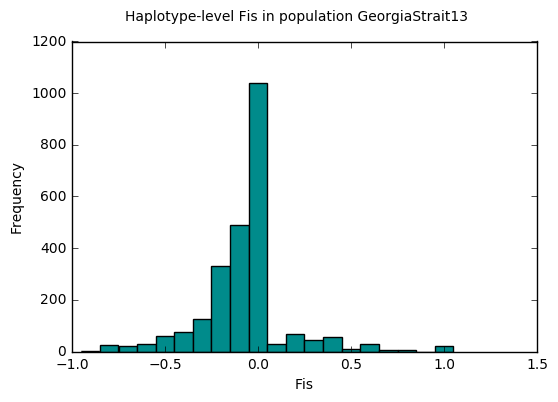

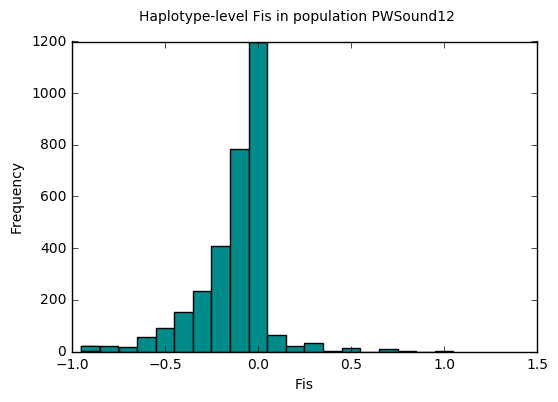

In [17]:
for i in range(0,len(header_pops)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
    plt.suptitle("Haplotype-level Fis in population " + pops[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()

In [18]:
fis_file.close()




<br>
<br>
<br>
### (3) Distribution of average read depth per tag ID

**I found the read depth of each catalog tag (aka each locus from the reference "genome") in each individual, and then took an average of those read depths for each catalog tag. I then plotted this against tag ID, and as a frequency histogram.**

**Read depth was calculated as the sum of the number of reads listed for that tag in the `.matches` files after `sstacks`**

<br>


Part of the following code was borrowed from Natalies [notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/data_processing_notebooks/plot_tagID_v_read_depth.ipynb). 

In [19]:
cd ../stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [23]:
myfile = open("../analyses/batch_2_FinalFilteredIndivids.txt", "r")
newfile = open("../analyses/batch2_list_matches_filenames.txt", "w")
for line in myfile:
    newfile.write(line.strip().split()[0] + "\n")
myfile.close()
newfile.close()

In [24]:
!head list_matches_filenames.txt

AD06_001.matches.tsv
AD06_002.matches.tsv
AD06_003.matches.tsv
AD06_004.matches.tsv
AD06_005.matches.tsv
AD06_006.matches.tsv
AD06_007.matches.tsv
AD06_008.matches.tsv
AD06_009.matches.tsv
AD06_010.matches.tsv


In [25]:
# create a list of .matches.tsv file names to open below
file_of_filenames = open("list_matches_filenames.txt","r")
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)

In [26]:
print filename_list[0:5]

['AD06_001.matches.tsv', 'AD06_002.matches.tsv', 'AD06_003.matches.tsv', 'AD06_004.matches.tsv', 'AD06_005.matches.tsv']


In [27]:
#initiate dictionary
rd_final_dict = {}
reps = 0

for file in filename_list:
    rd_dict = {}
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]   #read all of file except header
    newcount = 0
    #create the individual's dictionary of read depths per locus
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        if locus not in rd_dict:
            rd_dict[locus] = int(count) 
        elif locus in rd_dict:
            oldcount = rd_dict[locus]
            newcount = oldcount + count
            rd_dict[locus] = newcount
        else:
            print "Something funky is going on."
    #append all individual's counts to the final dictionary by locus
    locus_list = rd_dict.keys()
    for locus in locus_list: 
        reads = rd_dict[locus]
        if locus not in rd_final_dict: 
            rd_final_dict[locus] = [reads]
        else: 
            averages = rd_final_dict[locus]
            averages.append(reads)
            rd_final_dict[locus] = averages
    reps += 1
    print "file ", file, " counted."
    indfile.close()

file  AD06_001.matches.tsv  counted.
file  AD06_002.matches.tsv  counted.
file  AD06_003.matches.tsv  counted.
file  AD06_004.matches.tsv  counted.
file  AD06_005.matches.tsv  counted.
file  AD06_006.matches.tsv  counted.
file  AD06_007.matches.tsv  counted.
file  AD06_008.matches.tsv  counted.
file  AD06_009.matches.tsv  counted.
file  AD06_010.matches.tsv  counted.
file  AD06_011.matches.tsv  counted.
file  AD06_012.matches.tsv  counted.
file  AD06_013.matches.tsv  counted.
file  AD06_014.matches.tsv  counted.
file  AD06_015.matches.tsv  counted.
file  AD06_016.matches.tsv  counted.
file  AD06_017.matches.tsv  counted.
file  AD06_018.matches.tsv  counted.
file  AD06_019.matches.tsv  counted.
file  AD06_020.matches.tsv  counted.
file  AD06_021.matches.tsv  counted.
file  AD06_022.matches.tsv  counted.
file  AD06_023.matches.tsv  counted.
file  AD06_024.matches.tsv  counted.
file  AD06_025.matches.tsv  counted.
file  AD06_026.matches.tsv  counted.
file  AD06_027.matches.tsv  counted.
f

In [28]:
#checking final dictionary counts to make sure they are appending
#and not summing
print rd_final_dict[100]

[28, 11, 28, 20, 23, 28, 11, 15, 34, 14, 60, 23, 16, 37, 43, 15, 27, 18, 21, 10, 45, 11, 16, 28, 24, 13, 17, 11, 36, 68, 10, 42, 11, 35, 66, 56, 83, 24, 19, 68, 71, 13, 21, 31, 36, 41, 12, 21, 35, 18, 32, 10, 40, 53, 43, 52, 19, 53, 35, 13, 19, 15, 15, 35, 100, 25, 14, 24, 14, 43, 37, 14, 15, 14, 19, 27, 16, 14, 12, 14, 34, 10, 30, 57, 13, 48, 34, 25, 84, 16, 36, 23, 49, 13, 75, 30, 12, 66, 85, 15, 24, 41, 11, 16, 22, 10, 12, 13, 11, 25, 15, 10, 14, 70, 14, 43, 57, 30, 10, 11, 50, 21, 32, 10, 111, 10, 12, 21, 12, 51, 10, 31, 72, 38, 27, 13, 41, 16, 25, 19, 16, 59, 27, 41, 28, 84, 34, 71, 17, 83, 27, 45, 36, 16, 25, 84, 40, 32, 18, 26, 14, 50, 14, 45, 31, 12, 11, 19, 16, 43, 74, 28, 113, 59, 12, 11, 27, 17, 15, 22, 12, 24, 65, 51, 46, 15, 11, 19, 13, 39, 43, 28, 30, 15, 92, 50, 22, 113, 14, 28, 15, 45, 64, 31, 34, 30, 70, 38, 12, 44, 10, 56, 42, 17, 10, 45, 104, 10, 19, 70, 26, 39, 25, 16, 13, 17, 11, 22, 10, 17, 17]


In [29]:
#take averages at each locus
locus_list = rd_final_dict.keys()
rd_avg_dict = {}
for locus in locus_list: 
    newlist = rd_final_dict[locus]
    average = float(sum(newlist))/float(len(newlist))
    rd_avg_dict[locus] = average
        

In [30]:
#create a list of the read depth averages 
#by extracting values from dictionary
count_list = []
for locus in locus_list:
    avg_reads = rd_avg_dict[locus]
    count_list.append(avg_reads)

In [31]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

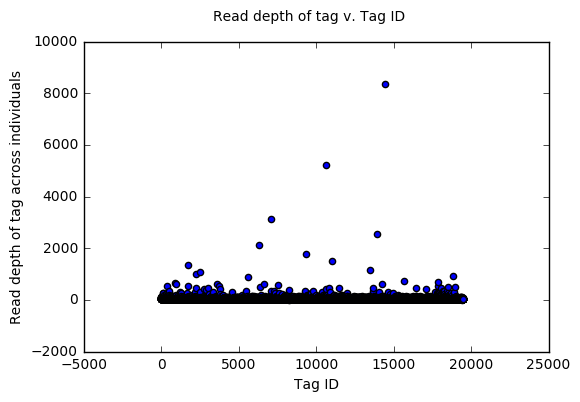

In [32]:
#create scatterplot
plt.scatter(locus_list, count_list)
plt.suptitle("Read depth of tag v. Tag ID")
plt.xlabel("Tag ID")
plt.ylabel("Read depth of tag across individuals")
plt.show()

In [33]:
plt.close()

In [34]:
# subset data to focus on read depths less than 1000
count_less_1000 = [num for num in count_list if num < 1000]

In [35]:
# what number of tags have a read depth of less than 100,000
len(count_less_1000)

19464

In [36]:
# what number of tags have a read depth of greater than 1000
len(count_list) - len(count_less_1000)

11

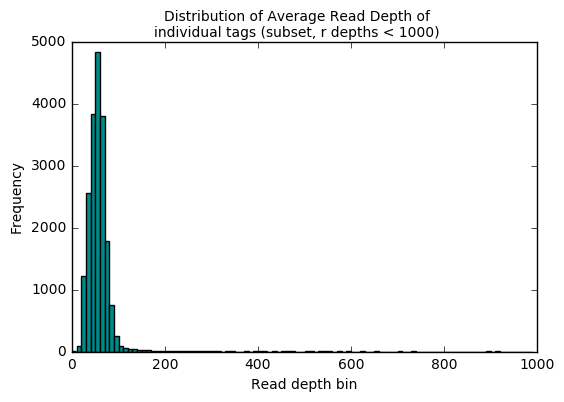

In [37]:
plt.hist(count_less_1000, bins = np.arange(0,1000, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags (subset, r depths < 1000)")
plt.show()

In [38]:
plt.close()

In [39]:
# subset read depths less than 400 (densest range in plot above)
count_less_400 = [num for num in count_list if num < 400]

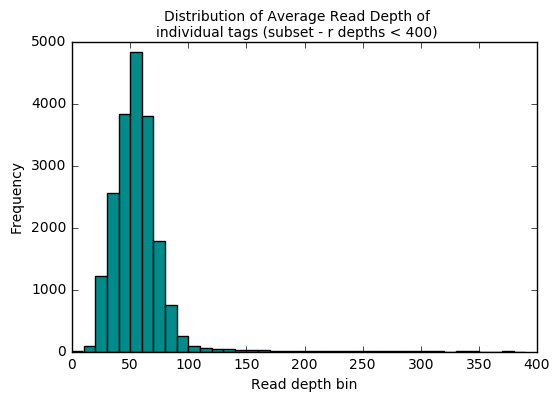

In [40]:
plt.hist(count_less_1000, bins = np.arange(0,400, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags (subset - r depths < 400)")
plt.show()

In [41]:
plt.close()


<br>
<br>
<br>
<br>
### Distribution of SNP Positions along Read Length


**I plotted all of the SNP positions across the 92 bp read**

**SNP position was found using the catalog of biallelic, polymorphic loci produced by Marine's filtering script.**


In [42]:
cd ../analyses/stacks_pipeline_visuals/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/stacks_pipeline_visuals


In [43]:
# create a list of snp position using marine's catalog file
infile = open("../../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

snp_positions = []

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        snp_positions.append(snp_pos)
    elif len(linelist) == 5:
        snp_pos = int(linelist[3])
        snp_positions.append(snp_pos)
        snp_pos = int(linelist[4])
        snp_positions.append(snp_pos)
        
infile.close()



In [44]:
len(snp_positions)

6542

In [45]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

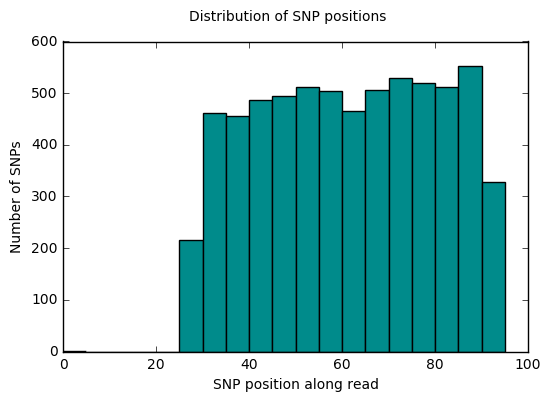

In [46]:
# plot histogram
plt.hist(snp_positions, bins = np.arange(0,100, 5), color = "darkcyan")
plt.xlabel("SNP position along read")
plt.ylabel("Number of SNPs")
plt.suptitle("Distribution of SNP positions")
plt.show()

In [47]:
plt.close()

<br>

<br>
<br>

### Fst v. SNP position

** I plotted the Fst of each locus against the position of the SNP along the 92 bp read**

** Fst of each locus was found by running `genepop` and then using Dan Drinan's parsing script.**


<br>

In [90]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

I first have to parse genepop output with Dan's script. 

**(1)** Ran genepop option **6** >> **1**

**(2)** Used Dan's python script to parse genepop output

In [91]:
cd genepop

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop


In [92]:
!head parseGenepopINFandFST.py

################################################################################
#
# parseGenepopINF.py - this is a script used to parse output files created
# by genepop
#
# 2017-March-21
# Daniel Drinan (ddrinan@uw.edu)
#
# population - HWE, He (INF), Ho (INF), Fis_wc (INF), Fis_RH (INF)
################################################################################


In [53]:
!mv ../../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.FST batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.FST

In [93]:
!python parseGenepopINFandFST.py \
-f batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.FST \
-o batch_2_FSTgenepop_parsed_output.txt

In [55]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop'

In [56]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()


infile2 = open("batch_2_FSTgenepop_parsed_output.txt", "r")

# create dictionary of fst values by locus
fst_dict = {}

for line in infile2:
    if "locus" not in line:
        locus = line.strip().split()[0]
        fst = float(line.strip().split()[2])
        fst_dict[locus] = fst

infile2.close()


In [57]:
# check to make sure that all SNPs from the FST genepop file are in the 
#SNP list from the biallelic catalog.

loci_2snps = []
fst_loci_list = fst_dict.keys()
snp_loci_list = snp_pos_dict.keys()
for locus in fst_loci_list:
    if locus not in snp_loci_list:
        loci_2snps.append(locus)
print "These are the loci that have two SNPs, and so were taken out of this analysis:"
print loci_2snps
        

These are the loci that have two SNPs, and so were taken out of this analysis:
['2260', '1225', '4724', '1143', '7686', '3829', '12033', '17296', '16838', '4838', '14861', '6513', '2509', '3026', '5079', '11124', '7148', '9008', '8496', '7484', '1455', '8400', '8338', '16416', '10784', '17424', '11300', '18309', '4237', '11514', '10919', '13358', '5114', '11998', '13177', '17320', '12161', '11220', '9065', '8978', '2908', '7137', '6588', '18061', '11154', '4667', '10940', '6008', '6312', '17495', '2933', '17649', '14382', '1788']


In [58]:

# create list of loci
# from the Fis file b/c of extra filtering done AFTER marine's file generated.

loci_list = fst_dict.keys()
snp_loci_list = snp_pos_dict.keys()
snp_pos_list = []
fst_list = []

for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        fst = float(fst_dict[locus])
        fst_list.append(fst)


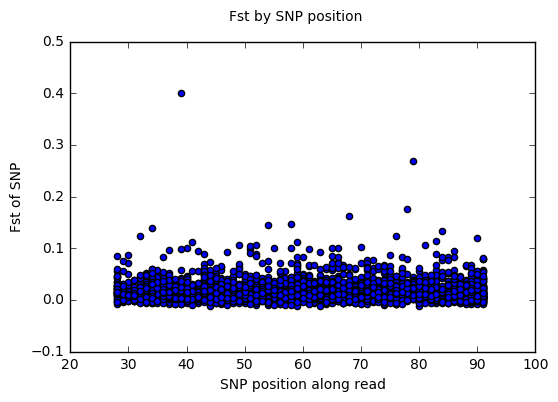

In [59]:
#create scatterplot
plt.scatter(snp_pos_list, fst_list)
plt.suptitle("Fst by SNP position")
plt.xlabel("SNP position along read")
plt.ylabel("Fst of SNP")
plt.show()

In [60]:
plt.close()


<br>


<br>
### Heterozygosity v. SNP position

** This plots the observed heterozygosity of the haplotype against the SNP position in the 92 bp read**

**SNP position was found using Marine's filtering script output for biallelic, polymorphic SNPs**

**Heterozygosity was found using `genepop` and then parsing the output with Dan Drinan's script.**

<br>

<br>

<br>
I first need a parsed .INF genepop file...

**(1)** Genepop option **5** >> **1**

**(2)** Use Dan's script to parse out the .INF output file.

In [61]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop'

In [62]:
!mv ../../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.INF batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.INF 

In [64]:
!python parseGenepopINFandFST.py \
-i batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.INF \
-o batch_2_INFgenepop_parsed_output.txt

^CTraceback (most recent call last):
  File "parseGenepopINFandFST.py", line 51, in <module>
    line = input_file.readline()
KeyboardInterrupt



In [67]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo


In [72]:
cd analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [73]:
infile = open("genepop/batch_2_INFgenepop_parsed_output.txt", "r")

# create a list of populations and a dictionary 
# dictionary keys are loci, values are list of He by population

h_dict = {}
pop_list = []

for line in infile: 
    if "pop" not in line:
        #create population list
        linelist = line.strip().split()
        population = linelist[0]
        if population not in pop_list:
            pop_list.append(population)
        # create new dictionary entry to append to existing entry
        locus = linelist[1]
        if locus not in h_dict.keys():
            Ho = float(linelist[3])
            h_dict[locus] = [Ho]
        elif locus in h_dict.keys():
            het_list = h_dict[locus]
            Ho = float(linelist[3])
            het_list.append(Ho)
            h_dict[locus] = het_list

infile.close()

In [74]:
loci_list = h_dict.keys()
loci_list[0:5]

['16073', '16075', '13732', '11545', '11549']

Some of the loci don't have the heterozygosity measurements for all of the populations, while others do:

In [76]:
h_dict['16075']

[0.0952380952381,
 0.117647058824,
 0.027027027027,
 0.0714285714286,
 0.386363636364,
 0.0714285714286,
 0.0416666666667,
 0.136363636364]

*this locus has calculated heterozygosities for all populations*

In [77]:
h_dict['13732']

[0.105263157895,
 0.212121212121,
 0.0526315789474,
 0.0526315789474,
 0.0416666666667,
 0.232558139535]

*this locus has calculated heterozygosities for only 7 / 8 populations*

This was an error while parsing the genepop output because of the stupid way that genepop formats its output files. It's not expected to greatly impact the graphs that I made, so I won't worry about this too much, but will just have to keep it in mind going forward. 

In [79]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()

snp_loci_list = snp_pos_dict.keys()

In [80]:
# get list of loci
loci_list = h_dict.keys()
avg_he_list = []
snp_pos_list = []

#find average he at each locus
for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        he_list = h_dict[locus]
        sum = 0
        for he in he_list:
            sum += float(he)
        average = float(sum)/float(len(he_list))
        avg_he_list.append(average)

In [81]:
len(avg_he_list)

2356

In [82]:
len(snp_pos_list)

2356

In [83]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

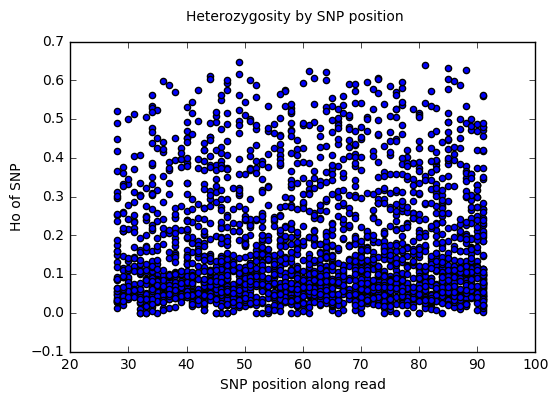

In [84]:
#create scatterplot
plt.scatter(snp_pos_list, avg_he_list)
plt.suptitle("Heterozygosity by SNP position")
plt.xlabel("SNP position along read")
plt.ylabel("Ho of SNP")
plt.show()

In [29]:
plt.close()




<br>
<br>
<br>

### Fis v. Heterozygosity
<br>
From the last two visualizations, I already have He and Fis lists. The indices should be the same since they are both listed in order of SNP position. 

In [85]:
len(avg_he_list)

2356

In [94]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()


infile2 = open("batch_2_FSTgenepop_parsed_output.txt", "r")

# create dictionary of fis values by locus
fis_dict = {}

for line in infile2:
    if "locus" not in line:
        locus = line.strip().split()[0]
        fis = float(line.strip().split()[1])
        fis_dict[locus] = fis

infile2.close()

In [98]:
# check to make sure that all SNPs from the FST genepop file are in the 
#SNP list from the biallelic catalog.

loci_2snps = []
fis_loci_list = fis_dict.keys()
snp_loci_list = snp_pos_dict.keys()
for locus in fis_loci_list:
    if locus not in snp_loci_list:
        loci_2snps.append(locus)
print "These are the loci that have two SNPs, and so were taken out of this analysis:"
print loci_2snps
        

These are the loci that have two SNPs, and so were taken out of this analysis:
['2260', '1225', '4724', '1143', '7686', '3829', '12033', '17296', '16838', '4838', '14861', '6513', '2509', '3026', '5079', '11124', '7148', '9008', '8496', '7484', '1455', '8400', '8338', '16416', '10784', '17424', '11300', '18309', '4237', '11514', '10919', '13358', '5114', '11998', '13177', '17320', '12161', '11220', '9065', '8978', '2908', '7137', '6588', '18061', '11154', '4667', '10940', '6008', '6312', '17495', '2933', '17649', '14382', '1788']


In [99]:

# create list of loci
# from the Fis file b/c of extra filtering done AFTER marine's file generated.

loci_list = fis_dict.keys()
snp_loci_list = snp_pos_dict.keys()
snp_pos_list = []
fis_list = []

for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        fis = float(fis_dict[locus])
        fis_list.append(fis)


In [100]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

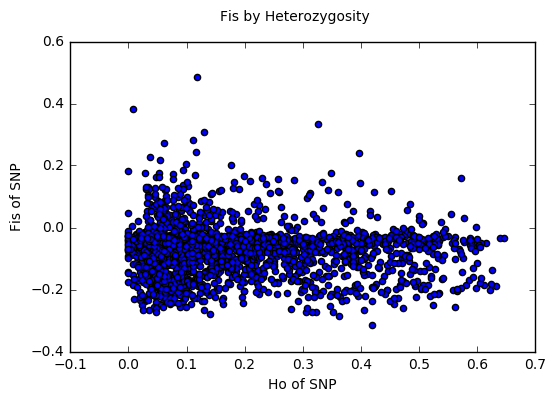

In [101]:
#create scatterplot
plt.scatter(avg_he_list, fis_list)
plt.suptitle("Fis by Heterozygosity")
plt.xlabel("Ho of SNP")
plt.ylabel("Fis of SNP")
plt.show()

In [102]:
plt.close()